In [ ]:
from dataset import Dataset
from classificadores import PerceptronSimples, MultiLayerPerceptron, ExtremeLearningMachine

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Conjunto de dados Coluna Vertebral =================================================
colunas = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "degree spondylolisthesis", "class"]

dataset = Dataset.from_file( 
    filepath = r"datasets\column_3C.dat", 
    label_column = -1,
    delimiter = " ",  
    column_names = colunas
).ensure_numeric_labels().normalize()

dataset.vectorize_labels()

print(dataset)

In [ ]:
# Conjunto de dados Câncer de Mama =================================================
colunas = ["ID", "Diagnosis", "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"]

dataset = Dataset.from_file( 
    filepath = r"datasets\wdbc.data", 
    label_column = 1,
    delimiter = ",",  
    column_names = colunas
).ensure_numeric_labels().remove_features(["ID"]).normalize()

dataset.vectorize_labels()

print(dataset)

In [35]:
acuracia_teste = {
    "PS": [], "MLP": [], "ELM": []
}

acuracia_treinamento = {
    "PS": [], "MLP": [], "ELM": []
}

# Percorre as rodada independentes
nRodadas = 50

for rodada in range( nRodadas ):
    print(f"\n==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== {rodada+1}/{nRodadas}")

    # Para cada rodada independente, realiza o shuffle e separa o conjunto de dados
    shuffled_dataset = dataset.shuffle()
    train_dataset, test_dataset = shuffled_dataset.split()

    # Cria instâncias para os classificadores
    PS = PerceptronSimples( train_dataset )
    MLP = MultiLayerPerceptron( train_dataset, q = 10 )
    ELM = ExtremeLearningMachine( train_dataset, q = 100 )

    # Treina cada uma das redes
    print("Treinando o PS:")
    PS.train( max_epocas = 300, eta = 0.0001 )

    print("\nTreinando o MLP:")
    MLP.train( max_epocas = 500, eta = 0.001 )

    print("\nTreinando o ELM")
    ELM.train()

    # Reseta os erros da rodada
    erros_treinamento = {
        "PS": 0, "MLP": 0, "ELM": 0
    }

    erros_teste = {
        "PS": 0, "MLP": 0, "ELM": 0
    }    

    #  Percorre o conjunto de treinamento e computa os erros
    for index, *features, classe_correta in train_dataset:
        classe_predita = PS.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["PS"] += 1

        classe_predita = MLP.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["MLP"] += 1

        classe_predita = ELM.predict( features )
        if classe_predita != classe_correta:
            erros_treinamento["ELM"] += 1

    # Percorre o conjunto de teste e computa os erros
    for index, *features, classe_correta in test_dataset:
        classe_predita = PS.predict( features )
        if classe_predita != classe_correta:
            erros_teste["PS"] += 1

        classe_predita = MLP.predict( features )
        if classe_predita != classe_correta:
            erros_teste["MLP"] += 1

        classe_predita = ELM.predict( features )
        if classe_predita != classe_correta:
            erros_teste["ELM"] += 1
    
    # Armazena a acurácia da rodada
    for classificador in ["PS", "MLP", "ELM"]:
        acuracia_treinamento[classificador].append(
            1 - erros_treinamento[classificador] / len(train_dataset)
        )

        acuracia_teste[classificador].append(
            1 - erros_teste[classificador] / len(test_dataset)
        )

Treinamento encerrado após 500 épocas. Custo = 0.06345507218571547.

Treinando o ELM
Treinamento encerrado. Custo = 0.10370885737232761

==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 50/50
Treinando o PS:
Treinamento encerrado após 300 épocas. Custo = 0.5974844085053997.

Treinando o MLP:
Treinamento encerrado após 500 épocas. Custo = 0.054762315769731285.

Treinando o ELM
Treinamento encerrado. Custo = 0.11179332122704165


In [52]:
print("Treinamento: ")
for classificador in ["PS", "MLP", "ELM"]:
    média = np.mean( acuracia_treinamento[classificador] )
    desvio = np.std( acuracia_treinamento[classificador], ddof=0 )

    print(f"{classificador}: {média*100:.2f}%±{desvio*100:.2f}%")

print("\nTeste:")
for classificador in ["PS", "MLP", "ELM"]:
    média = np.mean( acuracia_teste[classificador] )
    desvio = np.std( acuracia_teste[classificador], ddof=0 )

    print(f"{classificador}: {média*100:.2f}%±{desvio*100:.2f}%")


Treinamento: 
PS: 96.01%±0.86%
MLP: 98.25%±0.34%
ELM: 98.36%±0.36%

Teste:
PS: 94.23%±1.96%
MLP: 96.96%±1.58%
ELM: 95.70%±1.62%


C:\Users\fthia\AppData\Local\Temp\ipykernel_536\2293490635.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_treino, labels=["PS", "MLP", "ELM"], showmeans=True)


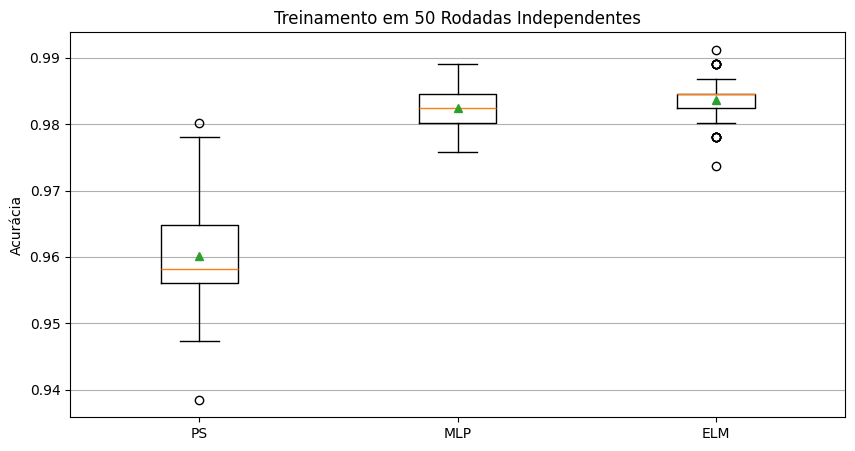

In [38]:
# Exemplo para um boxplot de acurácia em treino
plt.figure(figsize=(10, 5))

# Cada entrada é uma lista com 50 valores de acurácia
dados_treino = [
    acuracia_treinamento["PS"],
    acuracia_treinamento["MLP"],
    acuracia_treinamento["ELM"]
]

plt.boxplot(dados_treino, labels=["PS", "MLP", "ELM"], showmeans=True)
plt.ylabel("Acurácia")
plt.title("Treinamento em 50 Rodadas Independentes")
plt.grid(axis='y')
plt.show()

C:\Users\fthia\AppData\Local\Temp\ipykernel_536\2690114287.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(dados_teste, labels=["PS", "MLP", "ELM"], showmeans=True)


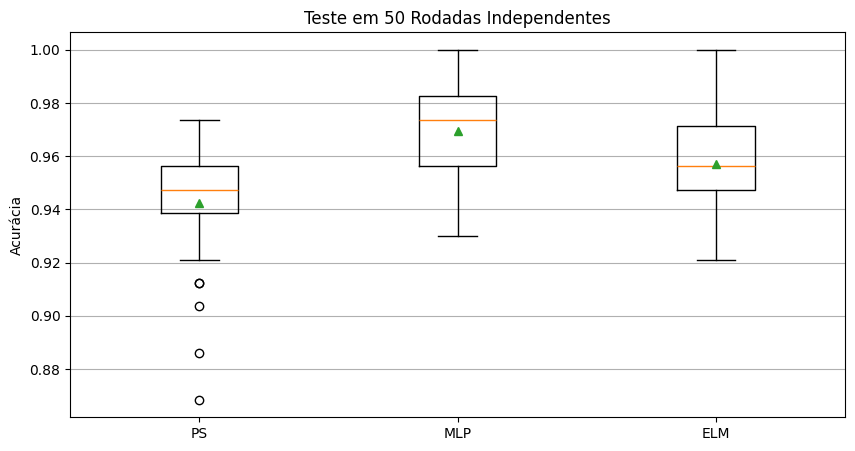

In [53]:
# Exemplo para um boxplot de acurácia em treino
plt.figure(figsize=(10, 5))

# Cada entrada é uma lista com 50 valores de acurácia
dados_teste = [
    acuracia_teste["PS"],
    acuracia_teste["MLP"],
    acuracia_teste["ELM"]
]

plt.boxplot(dados_teste, labels=["PS", "MLP", "ELM"], showmeans=True)
plt.ylabel("Acurácia")
plt.title("Teste em 50 Rodadas Independentes")
plt.grid(axis='y')
plt.show()